1/ Import framework et data

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import re
import mlflow
from sklearn.model_selection import train_test_split

BASE_DIR = Path(r"C:/Users/coach/Desktop/datascientest/OpenClassrooms/Projects_MLops/Projet_1_initialisation_MLops")
DATA_RAW = BASE_DIR / "data/raw"
DATA_PROC = BASE_DIR / "data" / "proceed"
DATA_PATH = DATA_PROC / "homecredit_features.csv"
df = pd.read_csv(DATA_PATH, low_memory=False)
print(df.shape)
#print(df.head())

train_df = df[df["TARGET"].notna()]
train_autoML = train_df.drop(columns=["SK_ID_CURR"])
X = train_df.drop(columns=["TARGET", "SK_ID_CURR"])
X = X.replace([np.inf, -np.inf], np.nan)
imputer = SimpleImputer(strategy="median") #remplace les valeurs manquantes par la médiane de chaque colonne
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)
y = train_df["TARGET"]
print(X.shape, y.shape)
print(y.value_counts(normalize=True)) #desequilibre des classes 0 (92%) et 1(8%)

(356251, 276)
(307507, 274) (307507,)
TARGET
0.0    0.91927
1.0    0.08073
Name: proportion, dtype: float64


In [2]:
#reduire la taille des donnees pour test rapide en conservant repartition des classes
X = X.sample(n=10000, random_state=42)
y = y.loc[X.index]
print(X.shape, y.shape)    

(10000, 274) (10000,)


2/ Metriques & business optimization

In [3]:
# metrique cout metier
def business_cost(y_true, y_pred, fn_cost=10, fp_cost=1):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fn * fn_cost + fp * fp_cost

# meilleur seuil
def find_best_threshold(y_true, y_proba):
    thresholds = np.arange(0.05, 0.95, 0.05)
    costs = []
    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        cost = business_cost(y_true, y_pred)
        costs.append(cost)
    best_idx = np.argmin(costs)
    return thresholds[best_idx], costs


3/ Modeles IA

In [ ]:
# cross-validation stratifiée 5-fold
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

# calcul rapport des classes pour XGBoost
neg = (y == 0).sum()
pos = (y == 1).sum()
scale_pos_weight = neg / pos

# definition des modeles
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(
            class_weight="balanced",
            n_jobs=-1,
            random_state=42
        ))
    ]),
    "RandomForest": RandomForestClassifier(
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    ),
    "MLP": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", MLPClassifier(activation="tanh",
            random_state=42
        ))
    ]),
    "XGBoost": xgb.XGBClassifier(
        scale_pos_weight=scale_pos_weight,
        eval_metric="auc",
        n_jobs=-1,
        random_state=42
    )}
     

3/ Training des modèles


========== Logistic Regression========
 Fold 1


Registered model 'HomeCredit_Scoring_Logistic_Regression' already exists. Creating a new version of this model...
Created version '25' of model 'HomeCredit_Scoring_Logistic_Regression'.


 Fold 2


Registered model 'HomeCredit_Scoring_Logistic_Regression' already exists. Creating a new version of this model...
Created version '26' of model 'HomeCredit_Scoring_Logistic_Regression'.


 Fold 3


Registered model 'HomeCredit_Scoring_Logistic_Regression' already exists. Creating a new version of this model...
Created version '27' of model 'HomeCredit_Scoring_Logistic_Regression'.


 Fold 4


Registered model 'HomeCredit_Scoring_Logistic_Regression' already exists. Creating a new version of this model...
Created version '28' of model 'HomeCredit_Scoring_Logistic_Regression'.


 Fold 5


Registered model 'HomeCredit_Scoring_Logistic_Regression' already exists. Creating a new version of this model...
Created version '29' of model 'HomeCredit_Scoring_Logistic_Regression'.



========== RandomForest========
 Fold 1


Registered model 'HomeCredit_Scoring_RandomForest' already exists. Creating a new version of this model...
Created version '21' of model 'HomeCredit_Scoring_RandomForest'.


 Fold 2


Registered model 'HomeCredit_Scoring_RandomForest' already exists. Creating a new version of this model...
Created version '22' of model 'HomeCredit_Scoring_RandomForest'.


 Fold 3


Registered model 'HomeCredit_Scoring_RandomForest' already exists. Creating a new version of this model...
Created version '23' of model 'HomeCredit_Scoring_RandomForest'.


 Fold 4


Registered model 'HomeCredit_Scoring_RandomForest' already exists. Creating a new version of this model...
Created version '24' of model 'HomeCredit_Scoring_RandomForest'.


 Fold 5


Registered model 'HomeCredit_Scoring_RandomForest' already exists. Creating a new version of this model...
Created version '25' of model 'HomeCredit_Scoring_RandomForest'.



========== MLP========
 Fold 1


c:\Users\coach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Registered model 'HomeCredit_Scoring_MLP' already exists. Creating a new version of this model...
Created version '21' of model 'HomeCredit_Scoring_MLP'.


 Fold 2


c:\Users\coach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Registered model 'HomeCredit_Scoring_MLP' already exists. Creating a new version of this model...
Created version '22' of model 'HomeCredit_Scoring_MLP'.


 Fold 3


c:\Users\coach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Registered model 'HomeCredit_Scoring_MLP' already exists. Creating a new version of this model...
Created version '23' of model 'HomeCredit_Scoring_MLP'.


 Fold 4


c:\Users\coach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Registered model 'HomeCredit_Scoring_MLP' already exists. Creating a new version of this model...
Created version '24' of model 'HomeCredit_Scoring_MLP'.


 Fold 5


c:\Users\coach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Registered model 'HomeCredit_Scoring_MLP' already exists. Creating a new version of this model...
Created version '25' of model 'HomeCredit_Scoring_MLP'.



========== XGBoost========
 Fold 1


Registered model 'HomeCredit_Scoring_XGBoost' already exists. Creating a new version of this model...
Created version '21' of model 'HomeCredit_Scoring_XGBoost'.


 Fold 2


Registered model 'HomeCredit_Scoring_XGBoost' already exists. Creating a new version of this model...
Created version '22' of model 'HomeCredit_Scoring_XGBoost'.


 Fold 3


Registered model 'HomeCredit_Scoring_XGBoost' already exists. Creating a new version of this model...
Created version '23' of model 'HomeCredit_Scoring_XGBoost'.


 Fold 4


Registered model 'HomeCredit_Scoring_XGBoost' already exists. Creating a new version of this model...
Created version '24' of model 'HomeCredit_Scoring_XGBoost'.


 Fold 5


Registered model 'HomeCredit_Scoring_XGBoost' already exists. Creating a new version of this model...
Created version '25' of model 'HomeCredit_Scoring_XGBoost'.



========== LightGBM ========
 Fold 1
[LightGBM] [Info] Number of positive: 19860, number of negative: 226145
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.111201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16735
[LightGBM] [Info] Number of data points in the train set: 246005, number of used features: 257
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


Registered model 'HomeCredit_Scoring_LightGBM' already exists. Creating a new version of this model...
Created version '16' of model 'HomeCredit_Scoring_LightGBM'.


 Fold 2
[LightGBM] [Info] Number of positive: 19860, number of negative: 226145
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16733
[LightGBM] [Info] Number of data points in the train set: 246005, number of used features: 258
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


Registered model 'HomeCredit_Scoring_LightGBM' already exists. Creating a new version of this model...
Created version '17' of model 'HomeCredit_Scoring_LightGBM'.


 Fold 3
[LightGBM] [Info] Number of positive: 19860, number of negative: 226146
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.115881 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16727
[LightGBM] [Info] Number of data points in the train set: 246006, number of used features: 257
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


Registered model 'HomeCredit_Scoring_LightGBM' already exists. Creating a new version of this model...
Created version '18' of model 'HomeCredit_Scoring_LightGBM'.


 Fold 4
[LightGBM] [Info] Number of positive: 19860, number of negative: 226146
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.120166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16698
[LightGBM] [Info] Number of data points in the train set: 246006, number of used features: 259
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


Registered model 'HomeCredit_Scoring_LightGBM' already exists. Creating a new version of this model...
Created version '19' of model 'HomeCredit_Scoring_LightGBM'.


 Fold 5
[LightGBM] [Info] Number of positive: 19860, number of negative: 226146
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16744
[LightGBM] [Info] Number of data points in the train set: 246006, number of used features: 256
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


Registered model 'HomeCredit_Scoring_LightGBM' already exists. Creating a new version of this model...
Created version '20' of model 'HomeCredit_Scoring_LightGBM'.



 Résultats des modèles :

                 model  mean_auc     mean_cost  mean_threshold  mean_accuracy
3              XGBoost  0.761810  32103.200000           0.470       0.727018
0  Logistic Regression  0.754125  32950.000000           0.530       0.724985
1         RandomForest  0.733110  34376.400000           0.100       0.716426
2                  MLP  0.675789  38842.000000           0.050       0.695620
4             LightGBM  0.768030  39954.736842           0.485       0.720281


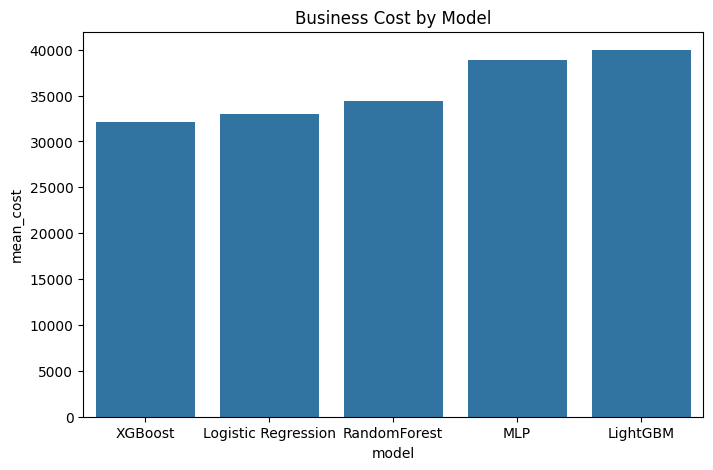

In [ ]:
# entrainement et evaluation des modeles

from logging import disable


mlflow.set_tracking_uri("file:./mlruns") #Projet_1_initialisation_MLops/notebook/mlruns
mlflow.set_experiment("HomeCredit_Scoring_all_models")
# Enable autologging for scikit-learn
mlflow.sklearn.autolog(disable==False)

results = []
for name, model in models.items():
    print(f"\n========== {name} =========")
    with mlflow.start_run(run_name=name):
        aucs = []
        costs = []
        thresholds = []
        accs = []
        for fold, (tr_idx, val_idx) in enumerate(skf.split(X, y)):
            print(f" Fold {fold+1}")
            X_train, X_val = X.iloc[tr_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[tr_idx], y.iloc[val_idx]
            model.fit(X_train, y_train)
            y_proba = model.predict_proba(X_val)[:,1]
            auc = roc_auc_score(y_val, y_proba)
            best_t, _ = find_best_threshold(y_val, y_proba)
            y_pred = (y_proba >= best_t).astype(int)
            cost = business_cost(y_val, y_pred)
            acc = accuracy_score(y_val, y_pred)
        
            # Log metrics
            mlflow.log_metric("AUC", auc)
            mlflow.log_metric("Accuracy", acc)
            mlflow.log_metric("Business_Cost", cost)
            mlflow.log_metric("Threshold", best_t)
            mlflow.set_tags({"model_type": name,"project": "HomeCredit_Scoring"})

            # Register model
            mlflow.sklearn.log_model(model,name="model",registered_model_name=f"HomeCredit_Scoring_{name.replace(' ', '_')}")

            accs.append(acc)
            aucs.append(auc)
            costs.append(cost)
            thresholds.append(best_t)
    
    results.append({
        "model": name,
        "mean_auc": np.mean(aucs),
        "mean_cost": np.mean(costs),
        "mean_threshold": np.mean(thresholds),
        "mean_accuracy": np.mean(accs)
    })

# model lightgbm
model_lgb = lgb.LGBMClassifier(class_weight="balanced",random_state=42,n_jobs=-1)

def clean_name(name):
    # keep letters, digits and underscore; replace others by underscore
    name = re.sub(r"[^0-9a-zA-Z_]", "_", str(name))
    # optional: collapse multiple underscores
    name = re.sub(r"_+", "_", name)
    return name
X = X.copy()
X.columns = [clean_name(c) for c in X.columns]

print(f"\n========== LightGBM ========")
with mlflow.start_run(run_name="LightGBM"):
    for fold, (tr_idx, val_idx) in enumerate(skf.split(X, y)):
        print(f" Fold {fold+1}")
        X_train, X_val = X.iloc[tr_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[tr_idx], y.iloc[val_idx]
        model_lgb.fit(X_train, y_train)
        y_proba = model_lgb.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_proba)
        best_t, costs = find_best_threshold(y_val, y_proba)
        y_pred = (y_proba >= best_t).astype(int)
        cost = business_cost(y_val, y_pred)
        acc = accuracy_score(y_val, y_pred)
        # Log metrics
        mlflow.log_metric("AUC", auc)
        mlflow.log_metric("Accuracy", acc)
        mlflow.log_metric("Business_Cost", cost)
        mlflow.log_metric("Threshold", best_t)
        mlflow.set_tags({"model_type": "LightGBM","project": "HomeCredit_Scoring"})

        # Register model
        mlflow.sklearn.log_model(model_lgb,name="model",registered_model_name=f"HomeCredit_Scoring_LightGBM")
        
        accs.append(acc)
        aucs.append(auc)
        costs.append(cost)
        thresholds.append(best_t)
    

results.append({
        "model": "LightGBM",
        "mean_auc": np.mean(aucs),
        "mean_cost": np.mean(costs),
        "mean_threshold": np.mean(thresholds),
        "mean_accuracy": np.mean(acc)
        })

#stockage des résultats dans un DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values("mean_cost", inplace=True)
print("\n Résultats des modèles :\n")
print(results_df.sort_values("mean_cost"))

#visualisation des résultats
plt.figure(figsize=(8,5))
sns.barplot(data=results_df,x="model",y="mean_cost")
plt.title("Business Cost by Model")
plt.show()

4/ fine tuning avec GridsearchCV

In [12]:
models = {
"Logistic Regression": {
    "model": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(
            max_iter=3000,
            class_weight="balanced"
        ))
    ]),
    "params": {
        "clf__C": [0.01, 0.1, 1],
        "clf__solver": ["lbfgs","liblinear"]
    }
},
"RandomForest": {
    "model": RandomForestClassifier(
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ),
    "params": {
        "n_estimators": [200, 400],
        "max_depth": [None, 10],
        "min_samples_leaf": [1, 5]
    }
},
"MLP": {
    "model": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", MLPClassifier(
            max_iter=500,
            random_state=42
        ))
    ]),
    "params": {
        "clf__hidden_layer_sizes": [(100,), (100,50)],
        "clf__alpha": [0.0001, 0.001]
    }
},
"XGBoost": {
    "model": xgb.XGBClassifier(
        eval_metric="auc",
        random_state=42,
        n_jobs=-1
    ),
    "params": {
        "n_estimators": [200, 400],
        "max_depth": [4, 6],
        "learning_rate": [0.05, 0.1]
    }
},
"LightGBM": {
    "model": lgb.LGBMClassifier(
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ),
    "params": {
        "n_estimators": [200, 400],
        "num_leaves": [31, 64],
        "learning_rate": [0.05, 0.1]
    }
}}

In [14]:
# meilleurs hyperparamètres pour tous les modèles
from sklearn.model_selection import GridSearchCV
mlflow.set_tracking_uri("file:./mlruns") #Projet_1_initialisation_MLops/notebook/mlruns
mlflow.set_experiment("HomeCredit_Scoring_all_models_gridsearch")

def clean_name(name):
    # keep letters, digits and underscore; replace others by underscore
    name = re.sub(r"[^0-9a-zA-Z_]", "_", str(name))
    # optional: collapse multiple underscores
    name = re.sub(r"_+", "_", name)
    return name
X = X.copy()
X.columns = [clean_name(c) for c in X.columns]

X_train_grid, X_val, y_train_grid, y_val = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

results_grid = []
best_models = {}

for name, cfg in models.items():
    print(f"\n========== {name} ========")
    accs = []
    aucs = []
    costs = []
    thresholds = []
    with mlflow.start_run(run_name=name):
        grid = GridSearchCV(
            cfg["model"],
            cfg["params"],
            scoring="roc_auc",
            cv=skf,
            n_jobs=-1,
            verbose=1
        )
        grid.fit(X_train_grid, y_train_grid)
        
        best_model = grid.best_estimator_
        y_proba = best_model.predict_proba(X_val)[:,1]
        best_t, best_cost = find_best_threshold(y_val, y_proba)
        y_pred = (y_proba >= best_t).astype(int) # condition meilleur seuil
        cost = business_cost(y_val, y_pred)
        acc = accuracy_score(y_val, y_pred)
        auc = roc_auc_score(y_val, y_proba)
        accs.append(acc)
        aucs.append(auc)
        costs.append(cost)
        thresholds.append(best_t)
        
        # Log metrics
        mlflow.log_metric("AUC", auc)
        mlflow.log_metric("Accuracy", acc)
        mlflow.log_metric("Business_Cost",cost)
        mlflow.log_metric("Threshold", best_t)
        mlflow.set_tags({"model_type": name,"project": "HomeCredit_Scoring_gridsearch"})
        # Register model
        mlflow.sklearn.log_model(best_model,name="model",registered_model_name=f"HomeCredit_Scoring_gridsearch_{name.replace(' ', '_')}")
        mlflow.log_params(grid.best_params_)
        
        print("Best params:", grid.best_params_)
        print("Best score:", grid.best_score_)
        print("Best threshold:", best_t)
        print("Business cost:", cost)
    
    results_grid.append({
            "model": name,
            "mean_auc": np.mean(aucs),
            "mean_cost": np.mean(costs),
            "mean_threshold": np.mean(thresholds),
            "mean_accuracy": np.mean(accs)
        })
    best_models[name] = best_model

print(results)
results_df_grid = pd.DataFrame(results_grid)
results_df_grid = results_df_grid.sort_values("mean_cost")
print(results_df_grid.sort_values("mean_cost"))

#visualisation des résultats
plt.figure(figsize=(9,5))
plt.bar(results_df_grid["model"],results_df_grid["mean_cost"])
plt.title("Business Cost par modèle (GridSearchCV)")
plt.ylabel("Business Cost")
plt.xlabel("Model")
plt.grid()
plt.show()

#courbe seuils vs cout metier
plt.figure(figsize=(8,5))
plt.plot(thresholds, costs)
plt.axvline(best_t, color="red", linestyle="--", label="Best threshold") #ligne de seuil optimal
plt.xlabel("Threshold")
plt.ylabel("Business Cost")
plt.title("Business Cost vs Decision Threshold")
plt.legend()
plt.grid()
plt.show()

#metriques finales
y_pred_final = (y_proba >= best_t).astype(int)
auc = roc_auc_score(y_val, y_proba)
acc = accuracy_score(y_val, y_pred_final)
print("AUC:", auc)
print("Accuracy:", acc)
print(classification_report(y_val, y_pred_final))

# enregistrement du meilleur modèle final
best_model_name = results_df_grid.iloc[0]["model"]
print("Best model:", best_model_name)
final_model = best_models[best_model_name]
mlflow.sklearn.log_model(final_model,name="model",registered_model_name=f"HomeCredit_Scoring_final_{best_model_name.replace(' ', '_')}")



========== Logistic Regression========
Fitting 5 folds for each of 6 candidates, totalling 30 fits


MemoryError: Unable to allocate 411. MiB for an array with shape (274, 196804) and data type float64